## Fluctuations on a path

This is a basic visualisation of a path which is a straight line but has random fluctuation in each step. <br>
Path aims behind the target (orange colour).

<b> Summary. </b>If the standard deviation of fluctuations is small, the strategy of aiming behind the target seems to guarantee success. If the standard deviation is large, the outcome (success or failure) seems to be random.

##### Input parameters

In [1]:
sigmas = [0.1, 0.5, 1, 1.5, 2] #standard deviations to be tested
no_of_runs_per_sigma = 5
no_of_steps = 10
target_value = 3
behind_the_target_value = 3.5 #intended to be larger than target_value
path_length = 10

In [2]:
import numpy as np
from matplotlib import pyplot as plt

##### Auxiliary

In [3]:
no_of_x_points = 100*no_of_steps
x = np.linspace(0, path_length, no_of_x_points)
y = behind_the_target_value/path_length*x
target = np.array([target_value]*len(x))

In [4]:
def repeated_entries(v, n):
    #repeats every v entry n times
    def my_concat(a,b):#wrapper around np.concatenate that is usable by reduce
        return np.concatenate((a,b))
    from functools import reduce
    return reduce(my_concat, [np.full((1,int(n)), v_entry)[0] for v_entry in v])#np.full may be used but it

def spreaded_array(v, target_length):
    #repeats entries of v so that it has target length
    #target_length must be multiplicity of length of v
    return repeated_entries(v, target_length/len(v))

In [5]:
fluct_pre_steps = np.cumsum(np.random.normal(0, 1, 9))#fluctuation steps
fluct_steps = np.concatenate((np.array([0]), fluct_pre_steps))

##### Visualisation

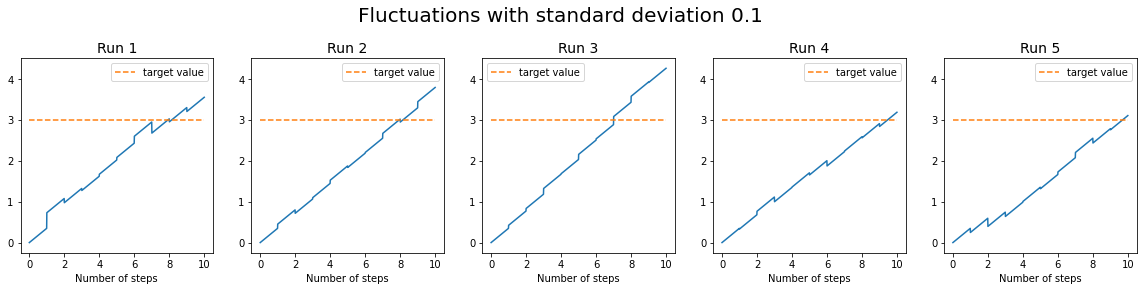

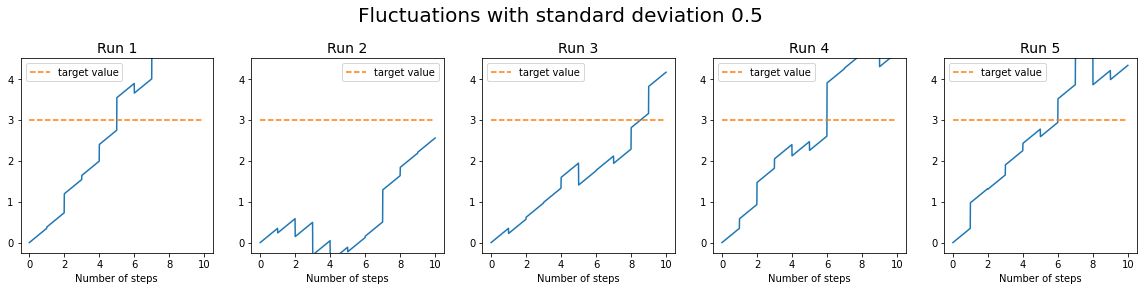

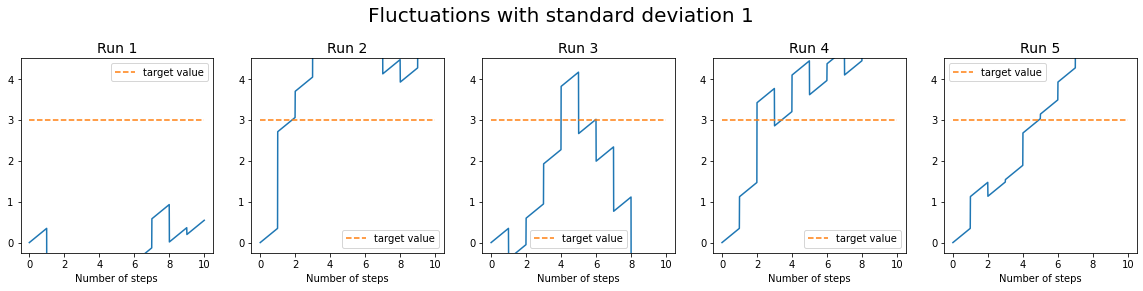

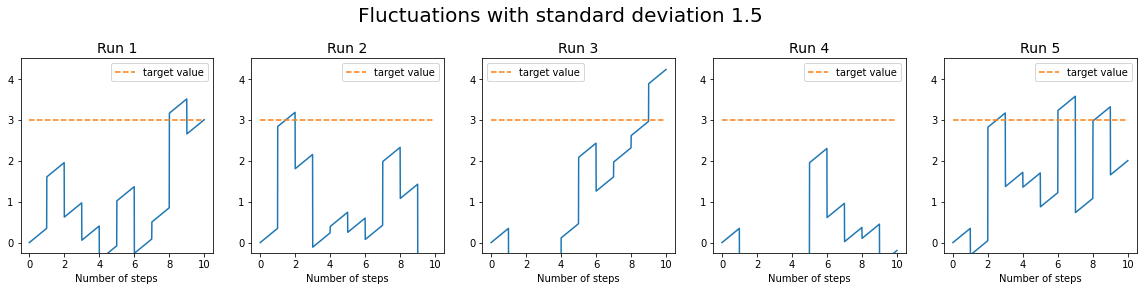

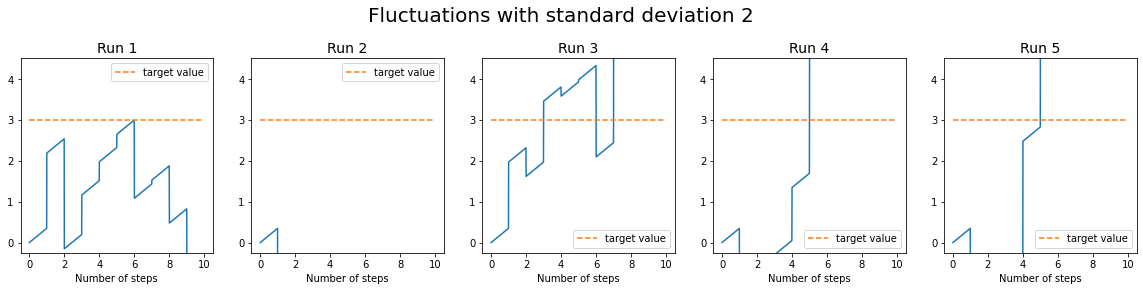

In [6]:
for sigma in sigmas:
    fig, ax = plt.subplots(1, no_of_runs_per_sigma, figsize=(20,4))
    for i in range(no_of_runs_per_sigma):#plot fluctuated y
        #create fluctuated y
        fluct_pre_steps = np.cumsum(np.random.normal(0, sigma, no_of_steps-1))#fluctuation steps
        fluct_steps = np.concatenate((np.array([0]), fluct_pre_steps))
        fluct = spreaded_array(fluct_steps, no_of_x_points)#actual fluctuation vector
        y_fluctuated = y + fluct
        #plot fluctuated y
        ax[i].plot(x, y_fluctuated)
        #plot target value
        ax[i].plot(x, np.full((1,len(x)), target_value)[0], '--', label='target value')
        #label plot (and set delimiters)
        fig.suptitle('Fluctuations with standard deviation' + ' ' + str(sigma), fontsize=20)
        ax[i].set_title('Run' + ' ' + str(i+1), fontsize=14)
        ax[i].set_xlabel('Number of steps')
        ax[i].set_ylim(0 + (-0.25), 4.5)
        ax[i].legend()
        plt.subplots_adjust(top=0.8)